reco dark photon $Z_d$ as electrons, $\Delta R$ match between ($Z_d$, e)

In [1]:
from rootpy.io import root_open
import os
from FireROOT.Analysis.Utils import *
from rootpy.plotting.style import set_style
from rootpy.plotting import Canvas, Efficiency, Legend

Welcome to JupyROOT 6.12/07


In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
fn = os.path.join(os.getenv('CMSSW_BASE'), 'src/FireROOT/Analysis/python/outputs/rootfiles/slimTrees/recoZdToEl__TREE.root')
f = root_open(fn)

In [4]:
f.keys()

[Key('egmlj')]

In [5]:
t=f.egmlj
sorted(t.branchnames)

['dp_daudr',
 'dp_eta',
 'dp_lxy',
 'dp_lz',
 'dp_pt',
 'ele_gendr',
 'ele_grade',
 'ele_idbit',
 'ele_pt',
 'j_emfrac',
 'j_gendr',
 'j_hadfrac',
 'j_id',
 'j_ncands',
 'j_neuemfrac',
 'j_neuhadfrac',
 'j_pt',
 'j_rawpt',
 'lj_area',
 'lj_gendr',
 'lj_ndau',
 'lj_nele',
 'lj_npho',
 'lj_pt',
 'pho_gendr',
 'pho_grade',
 'pho_haspix',
 'pho_idbit',
 'pho_isconv',
 'pho_pt',
 'rho']

In [6]:
set_style(MyStyle())
canvas = Canvas(500,400)

INFO:rootpy.plotting.style] using ROOT style 'CMSTDR'


# reco - electrons

### efficiencies

In [7]:
dplxy_total  = t.Draw(t.b.dp_lxy>>('dplxy_total', 500, 0, 750))
dplxy_passed = t.Draw(t.b.dp_lxy>>('dplxy_passed', 500, 0, 750), 'ele_gendr>0')

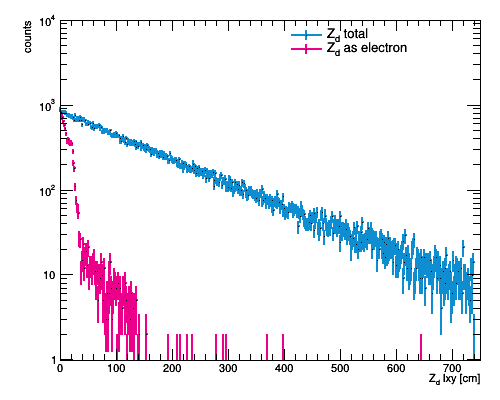

In [8]:
canvas.clear()

dplxy_total .linecolor=sigCOLORS[0]
dplxy_total .linewidth=2
dplxy_passed.linecolor=sigCOLORS[1]
dplxy_passed.linewidth=2


draw([dplxy_total, dplxy_passed,],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} lxy [cm]', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplxy_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplxy_passed, 'Z_{d} as electron', 'LEP')
leg.Draw()

canvas.draw()

In [9]:
effi_elelxyg = Efficiency(dplxy_passed, dplxy_total).graph

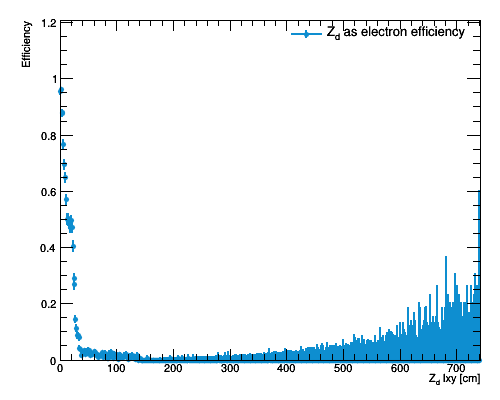

In [11]:
canvas.clear()

effi_elelxyg.drawstyle='APZ'
effi_elelxyg.color=sigCOLORS[0]
effi_elelxyg.linewidth=2
effi_elelxyg.markersize=0.5

draw(effi_elelxyg, pad=canvas, xtitle='Z_{d} lxy [cm]', ytitle='Efficiency')
leg = Legend(1, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(effi_elelxyg, 'Z_{d} as electron efficiency', 'LEP')
leg.Draw()

canvas.draw()

In [12]:
dplz_total  = t.Draw(abs(t.b.dp_lz)>>('dplz_total', 500, 0, 750))
dplz_passed = t.Draw(abs(t.b.dp_lz)>>('dplz_passed', 500, 0, 750), 'ele_gendr>0')

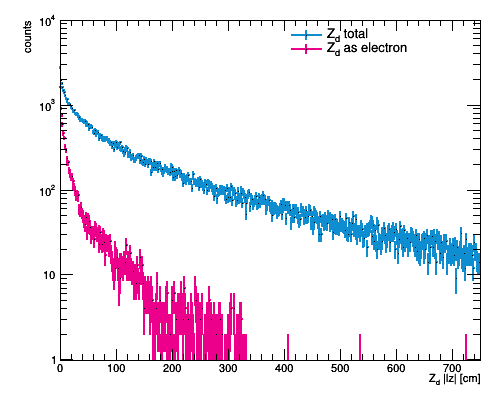

In [13]:
canvas.clear()

dplz_total .linecolor=sigCOLORS[0]
dplz_total .linewidth=2
dplz_passed.linecolor=sigCOLORS[1]
dplz_passed.linewidth=2


draw([dplz_total, dplz_passed,],
     pad=canvas, logy=True, ylimits=(1,1e4), xtitle='Z_{d} |lz| [cm]', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.45,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dplz_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dplz_passed, 'Z_{d} as electron', 'LEP')
leg.Draw()
canvas.draw()

In [14]:
effi_elelzg = Efficiency(dplz_passed, dplz_total).graph

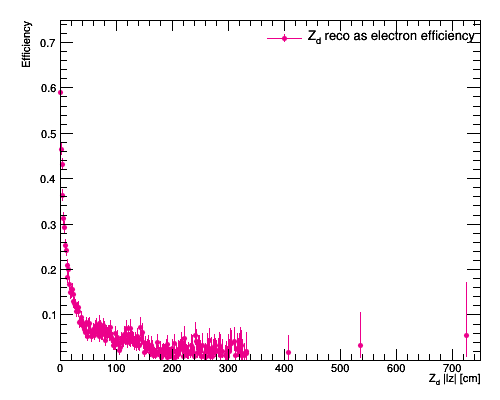

In [15]:
canvas.clear()

effi_elelzg.drawstyle='APZ'
effi_elelzg.color=sigCOLORS[1]
effi_elelzg.markersize=0.5


draw(effi_elelzg, xtitle='Z_{d} |lz| [cm]', ytitle='Efficiency')
leg = Legend(1, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(effi_elelzg, 'Z_{d} reco as electron efficiency', 'LEP')
leg.Draw()

canvas.draw()

In [16]:
IN_GSF = 'dp_lxy<20&abs(dp_lz)<20'

In [17]:
dpeta_total  = t.Draw(t.b.dp_eta>>('dpeta_total',  100, -2.5, 2.5), IN_GSF)
dpeta_passed = t.Draw(t.b.dp_eta>>('dpeta_passed', 100, -2.5, 2.5), IN_GSF+'&ele_gendr>0')

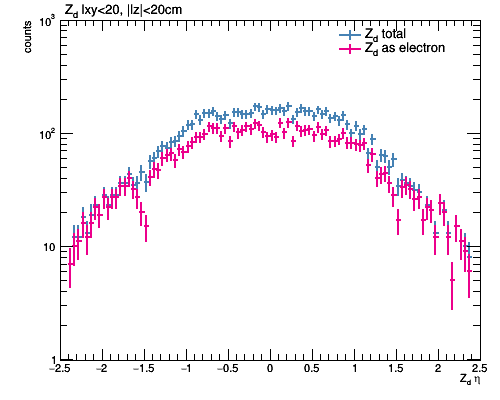

In [18]:
canvas.clear()

dpeta_total .color='steelblue'
dpeta_total .linewidth=2
dpeta_passed.color=sigCOLORS[1]
dpeta_passed.linewidth=2
draw([dpeta_total, dpeta_passed],pad=canvas, logy=True, ylimits=(1,1e3), xtitle='Z_{d} #eta', ytitle='counts')
leg = Legend(2, margin=0.25, leftmargin=0.55,
             topmargin=0.02, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dpeta_total, 'Z_{d} total', 'LEP')
leg.AddEntry(dpeta_passed, 'Z_{d} as electron', 'LEP')
leg.Draw()
title = TitleAsLatex('Z_{d} lxy<20, |lz|<20cm')
title.Draw()

canvas.draw()

In [19]:
effi_eleetag = Efficiency(dpeta_passed, dpeta_total).graph

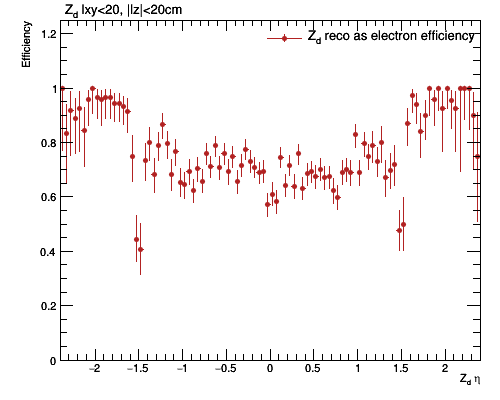

In [21]:
canvas.clear()

effi_eleetag.drawstyle='APZ'
effi_eleetag.color='firebrick'
effi_eleetag.markersize=0.5
draw([effi_eleetag], pad=canvas, xtitle='Z_{d} #eta', ytitle='Efficiency')
leg = Legend(1, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(effi_eleetag, 'Z_{d} reco as electron efficiency', 'LEP')
leg.Draw()
title = TitleAsLatex('Z_{d} lxy<20, |lz|<20cm')
title.Draw()

canvas.draw()

### $\Delta R$ matching quality

In [22]:
dr = t.Draw('ele_gendr', 'ele_gendr>0')

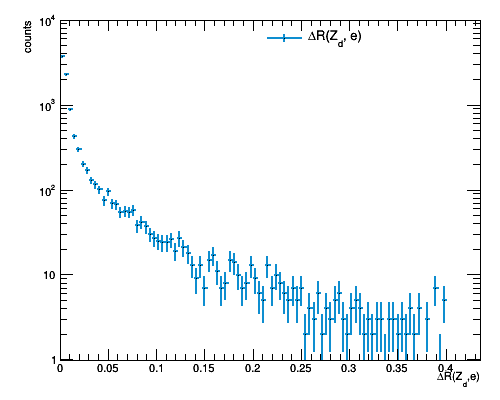

In [24]:
canvas.clear()

dr.linecolor=sigCOLORS[0]
dr.linewidth=2
draw(dr,pad=canvas, logy=True, ylimits=(1,1e4), xtitle='#DeltaR(Z_{d},e)', ytitle='counts')
leg = Legend(1, margin=0.25, leftmargin=0.4,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(dr, '#DeltaR(Z_{d}, e)', 'LEP')
leg.Draw()
canvas.draw()

### $p_T$ resolution

In [25]:
eleptres = t.Draw('(ele_pt-dp_pt)/dp_pt>>eleptres(50,-0.5,0.5)', 'ele_gendr>0')
eleptres = eleptres.merge_bins([(0,1), (-2,-1)])

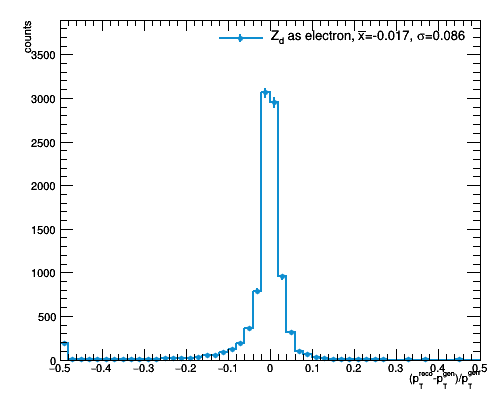

In [27]:
canvas.clear()

eleptres.color=sigCOLORS[0]
eleptres.linewidth=2
eleptres.fillstyle='hollow'
eleptres.markersize=0.5
eleptres.drawstyle='HIST E'

draw(eleptres, pad=canvas,xtitle='(p_{T}^{reco}-p_{T}^{gen})/p_{T}^{gen}', ytitle='counts')
leg=Legend(1, margin=0.25, leftmargin=0.3,
             topmargin=0.03, entrysep=0.01, entryheight=0.03, textsize=14,)
leg.AddEntry(eleptres, 'Z_{d} as electron, #bar{x}=%.3f, #sigma=%.3f' % (eleptres.get_mean(), eleptres.get_std_dev()), 'LEP')
leg.Draw()

canvas.draw()

### grade of matched electrons

In [28]:
grade_count = [t.GetEntries('(ele_grade&(1<<%d))==(1<<%d)&ele_gendr>0' % (i, i)) for i in range(4)]
grade_counts = [t.GetEntries('ele_grade==0&ele_gendr>0'),]+grade_count
grade_counts = np.array([float(x) for x in grade_counts])/t.GetEntries('ele_gendr>0')

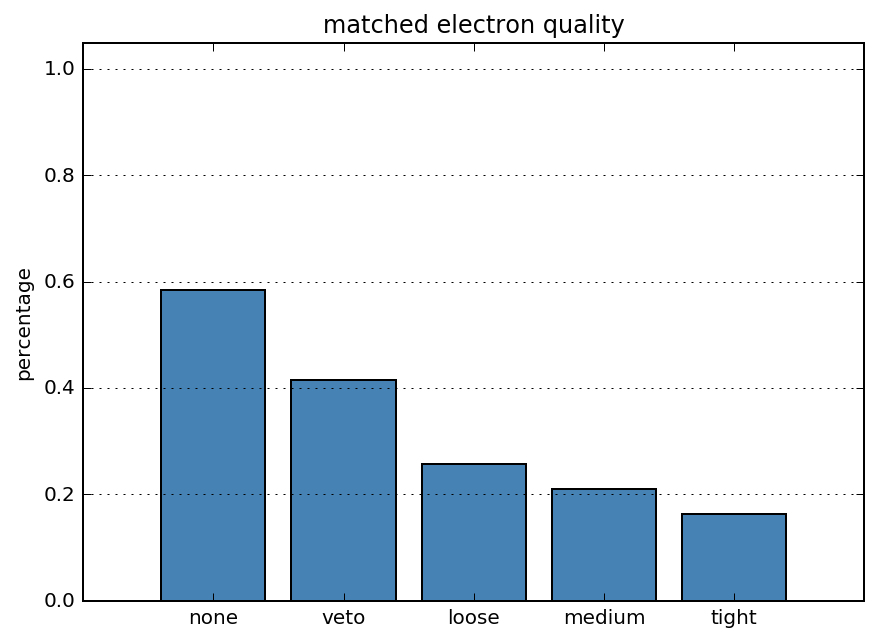

In [29]:
fig, ax = plt.subplots(1,1,figsize=(7, 5))
grade_labels = ['none', 'veto', 'loose', 'medium', 'tight']
xpos = np.arange(len(grade_labels))
ax.bar(xpos, grade_counts, align='center', tick_label=grade_labels, color='steelblue')
ax.set_ylabel('percentage')
ax.set_ylim(0,1.05)
ax.grid(axis='y', linestyle=':')
ax.set_title('matched electron quality');

### subID flags of *loose* ID

In [30]:
idbit_count = [t.GetEntries('(ele_idbit&(1<<%d))==(1<<%d)&ele_gendr>0' % (i, i)) for i in range(10)]
# idbit_counts = [t.GetEntries('ele_idbit==0&ele_gendr>0'),]+idbit_count
idbit_counts = np.array([float(x) for x in idbit_count])/t.GetEntries('ele_gendr>0')

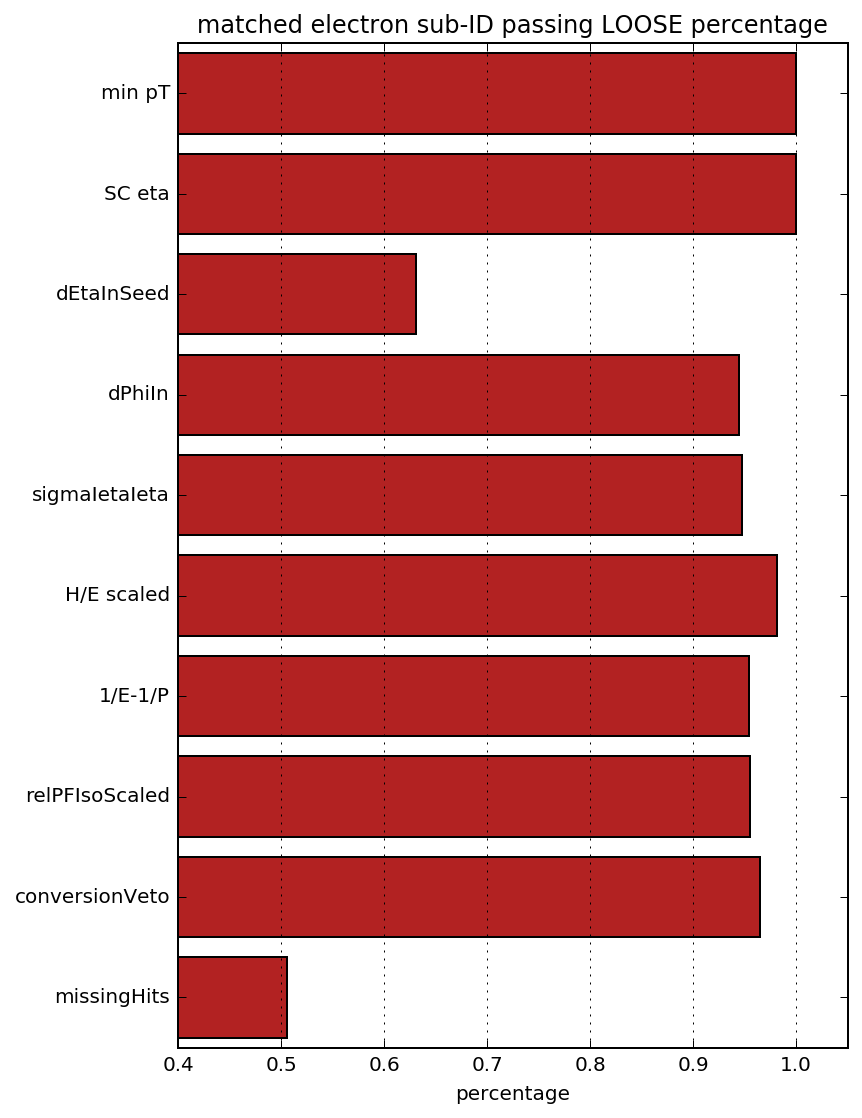

In [33]:
id_labels = ['min pT', 'SC eta', 'dEtaInSeed', 'dPhiIn', 'sigmaIetaIeta', 
             'H/E scaled', '1/E-1/P', 'relPFIsoScaled', 'conversionVeto', 'missingHits']
fig, ax = plt.subplots(1,1,figsize=(6,9))
xpos = np.arange(len(id_labels))
ax.barh(xpos[::-1], idbit_counts, align='center', tick_label=id_labels, color='firebrick',)
ax.set_xlabel('percentage')
ax.set_xlim(0.4,1.05)
ax.set_ylim(-0.5, 9.5)
ax.grid(axis='x', linestyle=':')
ax.set_title('matched electron sub-ID passing LOOSE percentage');